In [41]:
import json
import numpy as np
import pandas as pd
import requests
import datetime
def crawl_price(stock_id):

    d = datetime.datetime.now()
    url = "https://query1.finance.yahoo.com/v8/finance/chart/"+stock_id+"?period1=0&period2="+str(int(d.timestamp()))+"&interval=1d&events=history&=hP2rOschxO0"

    res = requests.get(url)
    data = json.loads(res.text)
    df = pd.DataFrame(data['chart']['result'][0]['indicators']['quote'][0], index=pd.to_datetime(np.array(data['chart']['result'][0]['timestamp'])*1000*1000*1000))
    return df
df1 = crawl_price("0050.TW")

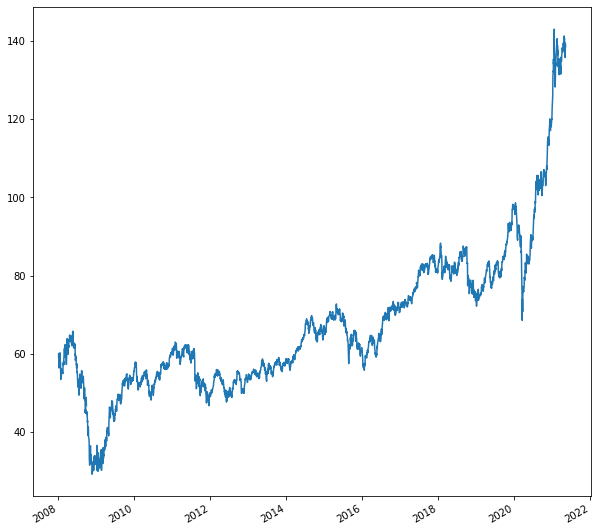

In [42]:
df1.close.plot()

In [43]:
url = "https://www.tradingview.com/markets/stocks-taiwan/market-movers-large-cap/"
response = requests.get(url)


In [44]:
import io

In [45]:
f = io.StringIO(response.text)
dfs = pd.read_html(f)
TW100 = dfs[0]

In [46]:
TW100.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2330 TAIWAN SEMICONDUCTOR MANUFACTURING,560.00,-1.93%,-11.00,Sell,136.345M,15273.000B,—,20.85,56831.00,Electronic Technology
1,2317 HON HAI PRECISION INDUSTRY,102.00,-4.67%,-5.00,Sell,150.498M,1566.350B,14.73,7.34,—,Electronic Technology
2,2454 MEDIATEK INC,888.00,-2.52%,-23.00,Sell,31.350M,1549.220B,—,38.54,—,Electronic Technology
3,6505 FORMOSA PETROCHEMICAL CORPORATION,97.70,-6.06%,-6.30,Sell,11.102M,1024.040B,28.05,3.71,—,Energy Minerals
4,2412 CHUNGHWA TELECOM,112.50,-1.75%,-2.00,Sell,28.077M,884.349B,26.20,4.37,—,Communications
5,2881 FUBON FINANCIAL HLDG CO LTD,70.00,-6.42%,-4.80,Buy,141.250M,783.894B,—,11.23,—,Finance
6,2882 CATHAY FINANCIAL HLDG CO,52.30,-7.60%,-4.30,Buy,139.837M,766.447B,10.47,5.41,57848.00,Finance
7,2 2308 DELTA ELECTRONIC,265.00,-2.21%,-6.00,Sell,16.475M,746.793B,23.54,11.55,—,Electronic Technology
8,1303 NAN YA PLASTIC,80.80,-5.94%,-5.10,Sell,25.153M,705.843B,—,5.34,—,Process Industries
9,2 2002 CHINA STEEL CORP,38.35,-8.69%,-3.65,Buy,721.998M,693.643B,53.59,0.79,—,Non-Energy Minerals


In [47]:
import time
TW50_history = {}
for i in range (50):
    #print(TW100["Unnamed: 0"][i])
    tmp = TW100["Unnamed: 0"][i].split()
    t=0
    while len(tmp[t])!=4:
      t+=1
    number = tmp[t]
    #print(number)
    name=""
    for i in range(t+1,len(tmp)):
      name+=tmp[i]+" "
    #print(name)
    TW50_history[name]=crawl_price(number+".TW")
    print(name,number)
    #time.sleep(5)

TAIWAN SEMICONDUCTOR MANUFACTURING  2330
HON HAI PRECISION INDUSTRY  2317
MEDIATEK INC  2454
FORMOSA PETROCHEMICAL CORPORATION  6505
CHUNGHWA TELECOM  2412
FUBON FINANCIAL HLDG CO LTD  2881
CATHAY FINANCIAL HLDG CO  2882
DELTA ELECTRONIC  2308
NAN YA PLASTIC  1303
CHINA STEEL CORP  2002
FORMOSA PLASTIC  1301
UNITED MICRO ELECTRONICS  2303
FORMOSA CHEMICAL & FIBRE CO  1326
EVERGREEN MARINE CORP(TAIWAN)  2603
ASE TECHNOLOGY HOLDING CO LTD  3711
CTBC FINANCIAL HOLDINGS COMPANY LTD  2891
MEGA FINANCIAL HOLDING CO  2886
UNI-PRESIDENT ENTERPRISES CORP  1216
LARGAN PRECISION CO  3008
QUANTA COMPUTER  2382
E SUN FINANCIAL HOLDINGS  2884
NOVATEK MICROELECTRONICS  3034
HOTAI MOTOR CO  2207
YUANTA FINANCIAL HOLDING CO. LTD.  2885
YANG MING MARINE TRANSPORT CORP  2609
TAIWAN CEMENT  1101
FIRST FINANCIAL HOLDING CO LTD  2892
TAIWAN COOPERATIVE FINANCIAL HLDGS  5880
ASUSTEK COMPUTER INC  2357
SILERGY CORP  6415
PRESIDENT CHAIN STORE CORP  2912
TAIWAN MOBILE CO  3045
CHAILEASE HOLDING COMPANY LIMITED

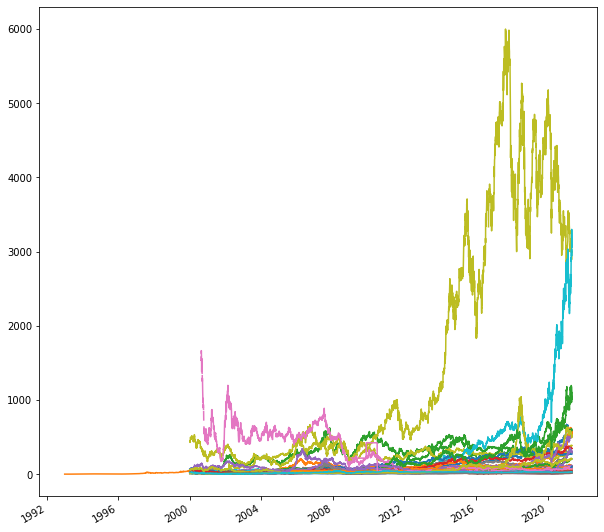

In [48]:
for name, history in TW50_history.items():
    history.close.plot()

In [49]:
close = {}
for name, price in TW50_history.items():
    if len(price) != 0:
        close[name] = price['close']

close = pd.DataFrame(close)
close = close.resample('1d').last().dropna(how='all', axis=1).dropna(how='all', axis=0)

In [50]:
corr = close.corr()
print(corr)

                                      TAIWAN SEMICONDUCTOR MANUFACTURING   ...  FAR EASTERN NEW CENTURY CORPORATION 
TAIWAN SEMICONDUCTOR MANUFACTURING                               1.000000  ...                              0.311750
HON HAI PRECISION INDUSTRY                                       0.516000  ...                              0.717659
MEDIATEK INC                                                     0.575808  ...                              0.569004
FORMOSA PETROCHEMICAL CORPORATION                                0.535725  ...                              0.610865
CHUNGHWA TELECOM                                                 0.689433  ...                              0.722233
FUBON FINANCIAL HLDG CO LTD                                      0.671389  ...                              0.453832
CATHAY FINANCIAL HLDG CO                                         0.174496  ...                              0.290364
DELTA ELECTRONIC                                                

In [51]:
pip install sns

In [52]:
import seaborn as sns
#sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

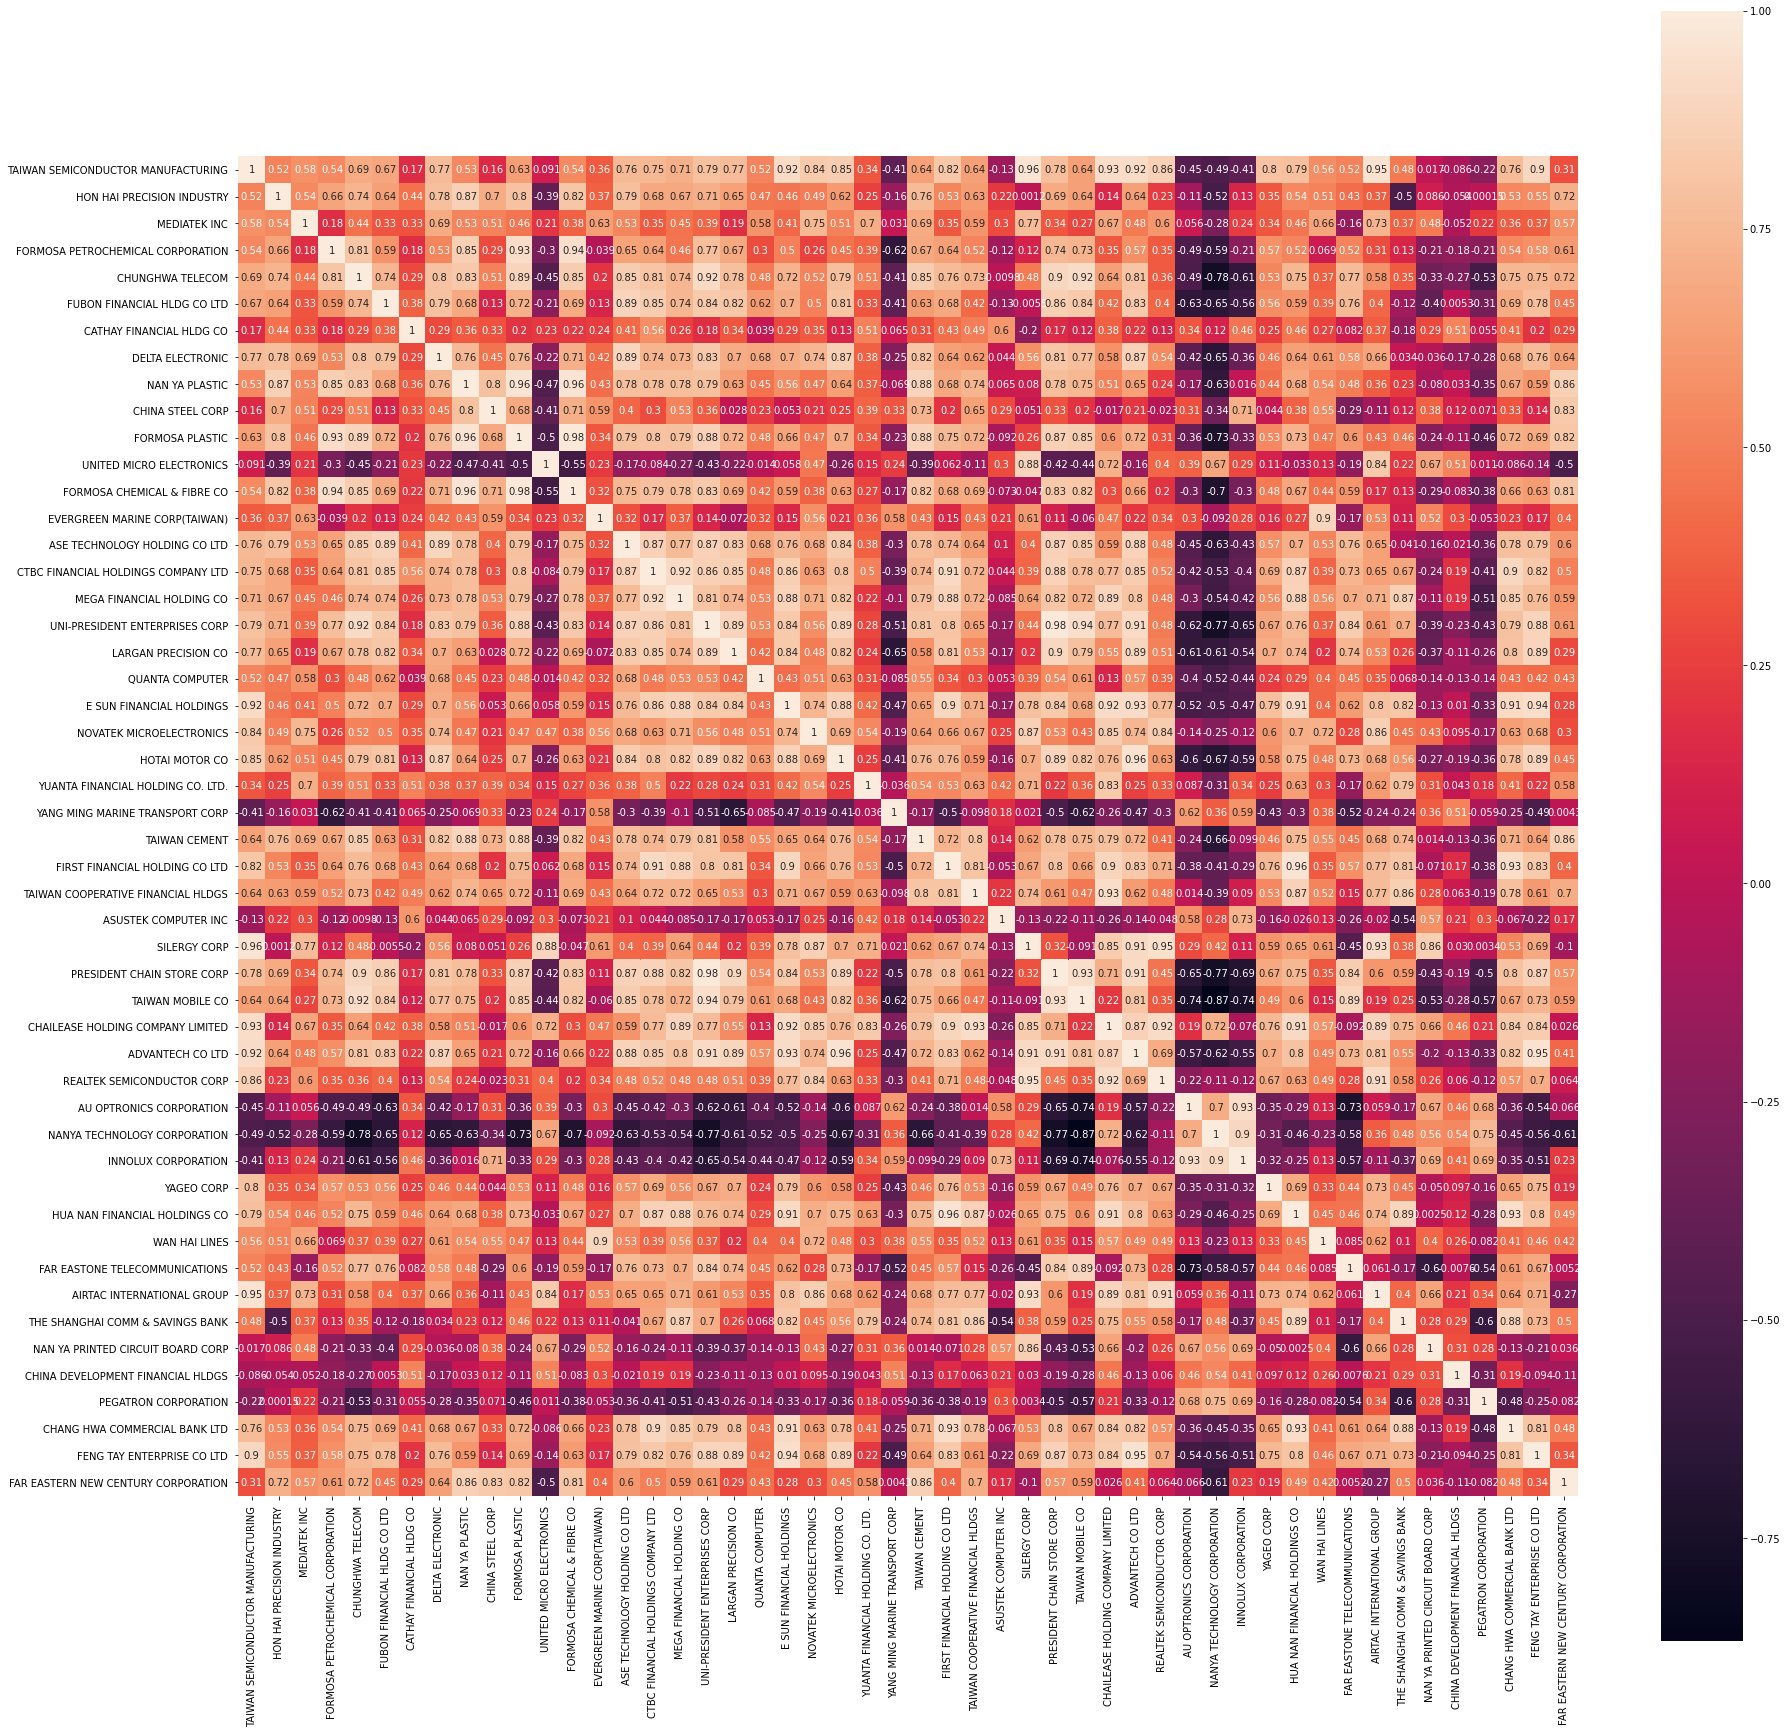

In [53]:
# set figure size
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 30)

# original code
import seaborn as sns
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

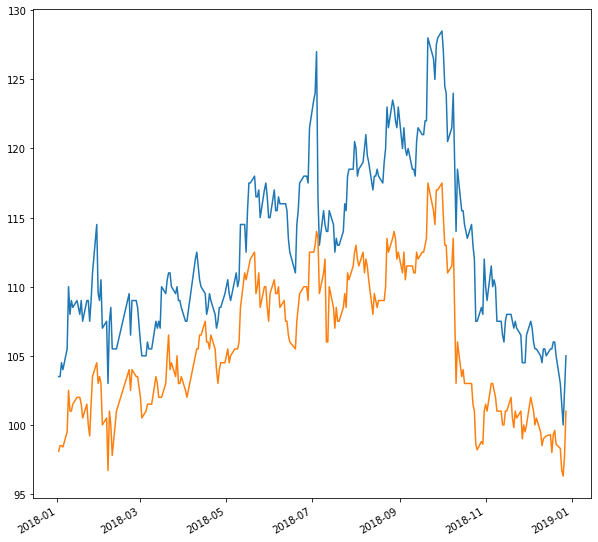

In [95]:
plt.rcParams['figure.figsize'] = (10, 10)
first = TW50_history["FORMOSA CHEMICAL & FIBRE CO "]['2018'].close
second = TW50_history["FORMOSA PLASTIC "]['2018'].close

first.plot()
second.plot()


In [103]:
new = first.copy()
newavg = first.copy()
for i in range(len(first)):
  new[i]=first[i]/second[i]
  newavg[i]=(first[i]+second[i])/2


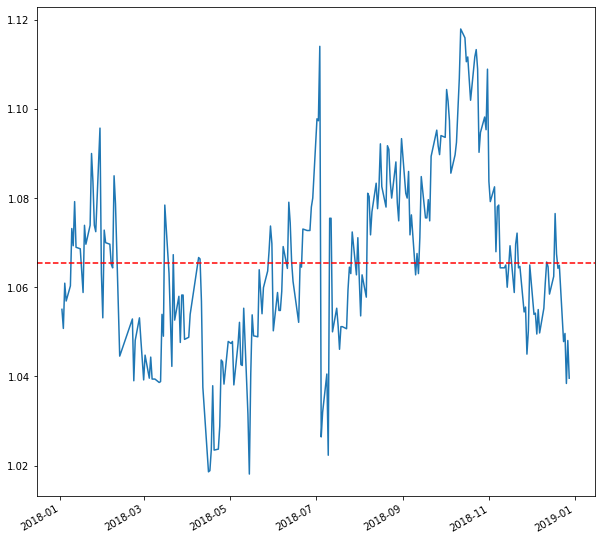

In [105]:
new.plot()
#newavg.plot()
plt.axhline(y = new.mean(), color = 'r', linestyle = '--')

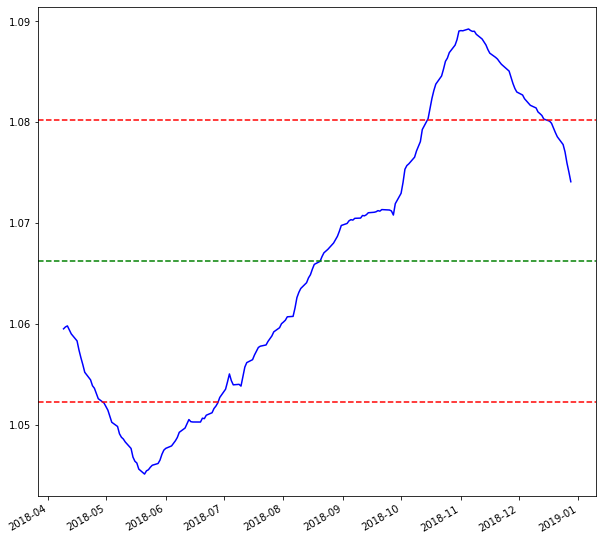

In [130]:
f = new.dropna()

d = 60
newf = f.rolling(d).mean()
newf.plot(color = 'b')
upl = newf.mean()+newf.std()
dol = newf.mean()-newf.std()
plt.axhline(y = newf.mean(), color = 'g', linestyle = '--')
plt.axhline(y = upl, color = 'r', linestyle = '--')
plt.axhline(y = dol,color = 'r',linestyle='--')

#f.plot()

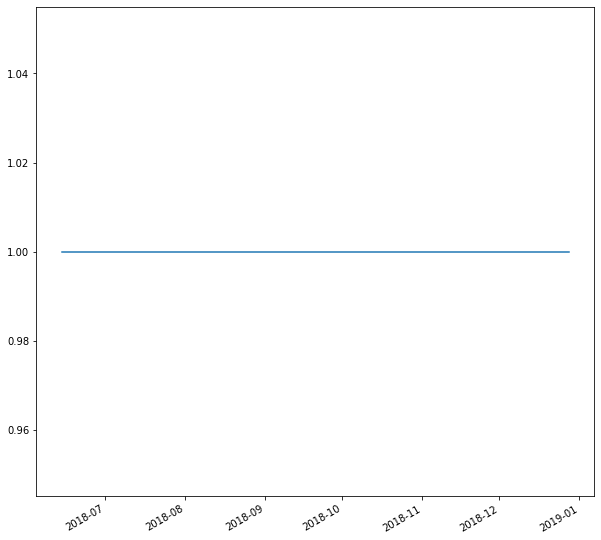

In [152]:
holdF = pd.Series(np.nan, index=buyF.index)
holdF[buyF] = 1
holdF[sellF] = -1
holdF.ffill(inplace=True)
holdF.plot()